# Analysis of Tecan plate reader data 

Data from experiments:
- 21/1/2015, 30&deg; celcius, inoculated from stationary phase, 1:100, no OD calibration (first measurements ~ blank). Looks better than 22/1
- 22/1/2015, 37&deg; celcius, inoculated from stationary phase, no OD calibration (first measurements ~ blank). No blanks.
- 8/2/2015, 30&deg; celcius, inoculated from exponential growth phase, 1:10, OD calibrated.
- 11/2/2015, 30&deg; celcius, inoculated from stationary phase, 1:20, OD calibrated.
- 24/3/2015, 30&deg; celcius, inoculated from stationary phase, 1:20, OD calibrated. Four strains, by column: GGGGRRZZZEEE.
- 26/3/2015, 37&deg; celcius, inoculated from stationary phase, 1:20, OD calibrated. Nine strains, one column each.
- 11/5/2015, 30&deg; celcius, inoculated from stationary phase, 1:20, OD calibrated. DH5alfa+GFP, DHs12+RFP, TG1+RFP, competitions between GFP and both RFP.

Standard microplate arrangement (unless otherwise mentioned):

- Wells in rows 1-4 were inoculated with bacteria with GFP plasmid
- Wells in rows 9-12 were inoculated with bacteria with RFP plasmid
- Wells in rows 5-8 were inoculated with bacteria with GFP plasmid and bacteria with RFP plasmid in equal quantities
- Wells G12 and H12 were blank (no bacteria, medium only)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import log, exp
import pandas as pd
from lmfit import Model
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster', font_scale=1.5, rc={'figure.figsize':(8.6, 5.9)})

In [2]:
import curveball

In [3]:
filename = r"D:\workspace\curveball_project\data\dorith\20140828_dorit_hsp90_20140814_52_xyl_merge\plate_9_OD.mat"
max_time = 24

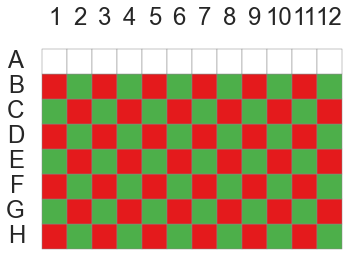

In [4]:
plate = pd.read_csv(r"d:/workspace/curveball_project/python/plate_templates/checkerboard2.csv")
fig,ax = curveball.plots.plot_plate(plate)

In [5]:
reload(curveball.ioutils)
print filename
df = curveball.ioutils.read_tecan_mat(filename, max_time=48, plate=plate)
print df.shape
df.head()

D:\workspace\curveball_project\data\dorith\20140828_dorit_hsp90_20140814_52_xyl_merge\plate_9_OD.mat
(4416, 8)


,Cycle Nr.,Time,Well,OD,Row,Col,Color,Strain
0,1,0.000000,A1,0.0621,A,1,#ffffff,0
1,2,1.000000,A1,0.0629,A,1,#ffffff,0
2,3,1.999722,A1,0.0633,A,1,#ffffff,0
3,4,2.999722,A1,0.0638,A,1,#ffffff,0
4,5,4.000000,A1,0.0644,A,1,#ffffff,0


['0' 'R' 'G']


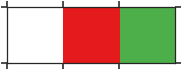

In [6]:
sns.palplot(df.Color.unique())
print df.Strain.unique()

In [7]:
df.Time /= 3.0
df.Strain[df.Strain=='0'] = 'Blank'
df.Strain[df.Strain=='R'] = 'TG1'
df.Strain[df.Strain=='G'] = 'DH5a'

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## OD measurements

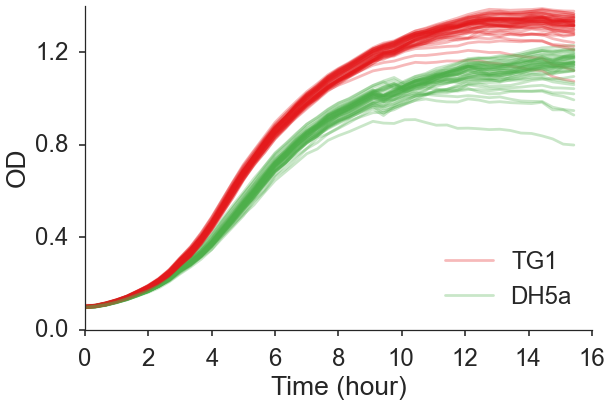

In [8]:
for well in df.Well.unique():
    df_well = df[df.Well == well]
    color = df_well.Color.unique()[0]
    plt.plot(df_well.Time, df_well.OD, color=color, alpha=0.3)

plt.xlabel('Time (hour)')
plt.ylabel('OD')
sns.despine()
plt.tight_layout()
plt.yticks([0,0.4,0.8,1.2])
plt.gca().get_lines()[12].set_label(df.Strain.unique()[1])
plt.gca().get_lines()[13].set_label(df.Strain.unique()[2])
plt.legend(loc='lower right')
plt.savefig('all_curves.png', bbox_inches='tight')

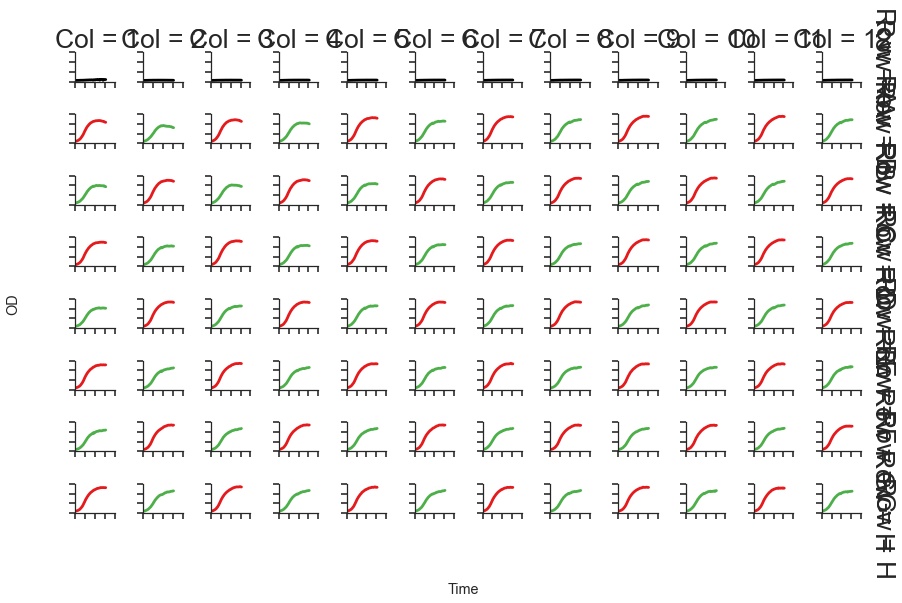

In [9]:
g = curveball.plots.plot_wells(df, 'Time', 'OD')
g.set_xticklabels([])
g.set_yticklabels([])
g.set_titles(template='{col_name} | {row_name}')
#g.savefig("96wells.png")

# Analysis

## Average gorwth curves

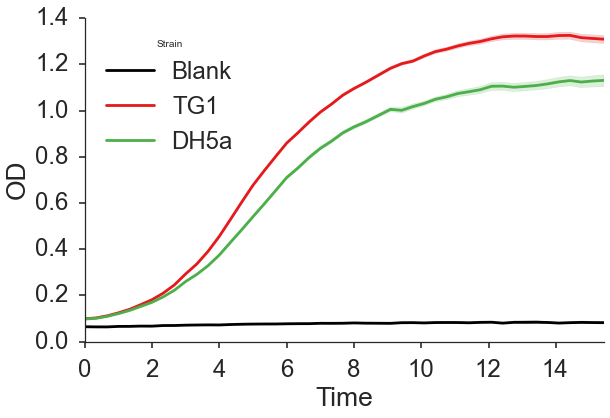

In [10]:
g = curveball.plots.tsplot(df)
fig = g.get_figure()
fig.tight_layout()
fig.savefig('tsplot.png', bbox_inches='tight')

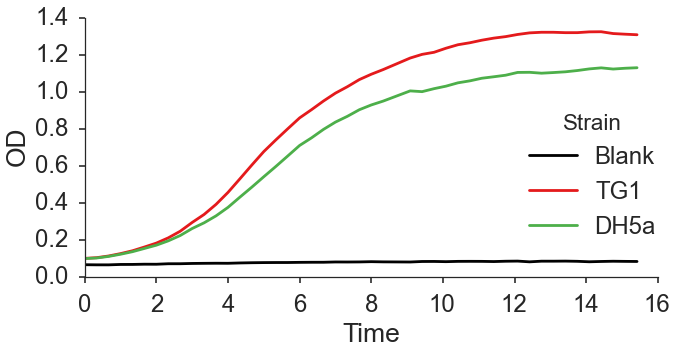

In [11]:
g = curveball.plots.plot_strains(df)
g.fig.tight_layout()
g.savefig('plot_strains.png', bbox_inches='tight')

# Model fitting

[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 7159
    # data points      = 46
    # variables        = 6
    chi-square         = 4.948
    reduced chi-square = 0.124
[[Variables]]
    y0:   0.09628637 +/- 0.000517 (0.54%) (init= 0.09769048)
    r:    120.271972 +/- 2.97e+04 (24656.53%) (init= 0.06137468)
    K:    1.12080954 +/- 0.009630 (0.86%) (init= 1.13076)
    nu:   0.00402757 +/- 0.992637 (24646.02%) (init= 1)
    q0:   0.17838745 +/- 0.225214 (126.25%) (init= 1)
    v:    0.69636934 +/- 0.103340 (14.84%) (init= 1)

Model(baranyi_roberts_function) 6
Model(baranyi_roberts_function) 5
Model(richards_function) 4
Model(logistic_function) 3


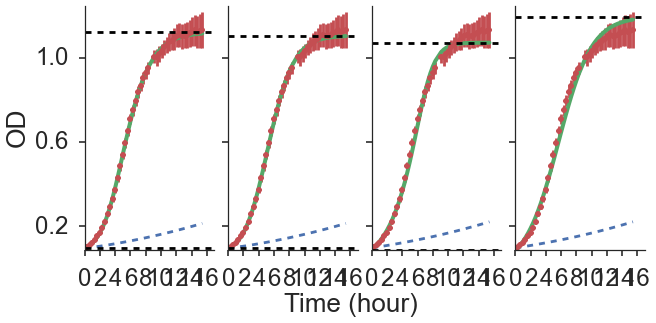

In [12]:
G_models,fig,ax = curveball.models.fit_model(df[df.Strain=='DH5a'], use_weights=True)
plt.setp(ax, title='')
#plt.setp(ax, xticks=[0,6,12])
plt.setp(ax, yticks=[0.2,0.6,1.0])
plt.setp(ax, xlabel='')
fig.text(0.4, -0.1, 'Time (hour)', fontsize=26)
fig.tight_layout()
fig.set_figwidth(8.6)
fig.set_figheight(5.9*2/3.)
fig.savefig("G_models.png", bbox_inches='tight')
for m in G_models:
    print m.model.name, m.nvarys

[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 253
    # data points      = 46
    # variables        = 5
    chi-square         = 25.912
    reduced chi-square = 0.632
[[Variables]]
    y0:   0.09842154 +/- 0.001500 (1.52%) (init= 0.0987)
    r:    0.61778507 +/- 0.010402 (1.68%) (init= 0.05828015)
    K:    1.29581532 +/- 0.007808 (0.60%) (init= 1.325617)
    nu:   1 (fixed)
    q0:   0.27545655 +/- 0.075274 (27.33%) (init= 1)
    v:    1.62952701 +/- 0.269764 (16.55%) (init= 1)

Model(baranyi_roberts_function) 5
Model(logistic_function) 3
Model(richards_function) 4
Model(baranyi_roberts_function) 6


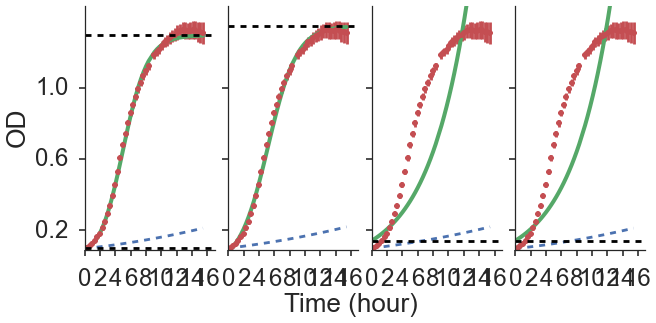

In [13]:
R_models,fig,ax = curveball.models.fit_model(df[df.Strain=='TG1'])
plt.setp(ax, title='')
#plt.setp(ax, xticks=[0,20,40])
plt.setp(ax, yticks=[0.2,0.6,1.0])
plt.setp(ax, xlabel='')
fig.text(0.4, -0.1, 'Time (hour)', fontsize=26)
fig.tight_layout()
fig.set_figwidth(8.6)
fig.set_figheight(5.9*2/3.)
fig.savefig("R_models.png", bbox_inches='tight')
for m in R_models:
    print m.model.name, m.nvarys

In [14]:
print "G:"
print G_models[0].best_values, 
print "lag:", curveball.models.find_lag(G_models[0], PLOT=False), 
print "mu:", curveball.models.find_max_growth(G_models[0], PLOT=False)[-1]

print "R:"
print R_models[0].best_values,
print "lag:", curveball.models.find_lag(R_models[0], PLOT=False), 
print "mu:", curveball.models.find_max_growth(R_models[0], PLOT=False)[-1]

G:
{'q0': 0.17838745335095693, 'K': 1.1208095400310887, 'r': 120.27197265683523, 'v': 0.69636934438745079, 'y0': 0.096286379292019442, 'nu': 0.0040275782260950077} lag: 2.17308992205 mu: 0.421526726455
R:
{'q0': 0.27545655637258909, 'K': 1.2958153251258935, 'r': 0.61778507122985205, 'v': 1.6295270107833539, 'y0': 0.098421542657958216, 'nu': 1.0} lag: 2.1481011496 mu: 0.477602324729


In [15]:
G_color = plate.Color[plate.Strain=='G'].unique()[0]
R_color = plate.Color[plate.Strain=='R'].unique()[0]

In [16]:
gm = G_models[0]
rm = R_models[0]

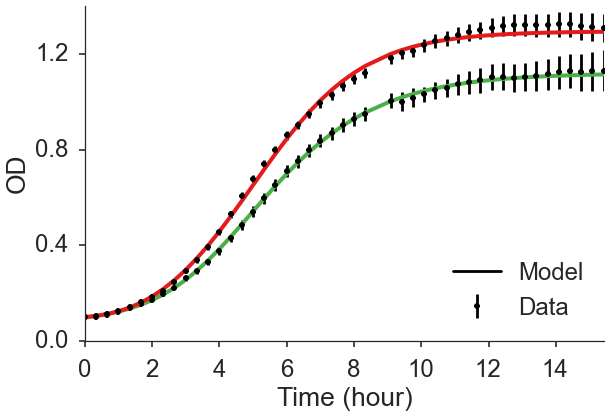

In [17]:
fig,ax = plt.subplots(1, 1)

ax.plot([-1],[0], color='k', label='Model')
ax.plot(df.Time.unique(), gm.best_fit, color=G_color, lw=4)#, label='G')
ax.errorbar(df.Time.unique(), gm.data, 1./gm.weights, color='k', ls='', marker='.', label='Data')
ax.plot(df.Time.unique(), rm.best_fit, color=R_color, lw=4)#, label='R')
ax.errorbar(df.Time.unique(), rm.data, 1./rm.weights, color='k', ls='', marker='.')

ax.set_xlim(0,df.Time.max())
ax.legend(loc='lower right')
#ax.legend().set_visible(False)
ax.set_ylabel('OD')
ax.set_xlabel('Time (hour)')
ax.set_title('')
ax.set_yticks([0,0.4,0.8,1.2])
sns.despine()
fig.tight_layout()
fig.savefig('model_fits.png', bbox_inches='tight')

# Competition simulation

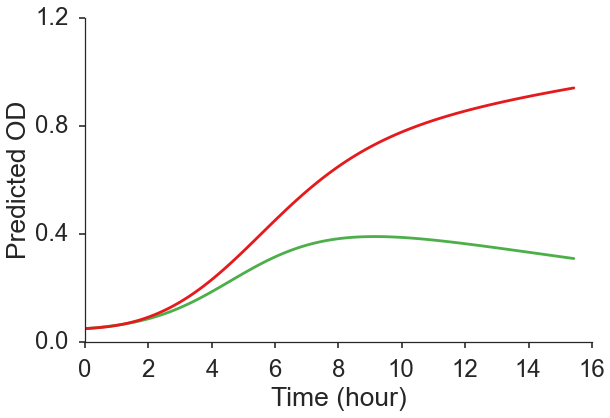

In [18]:
t,y,fig,ax = curveball.competitions.compete(G_models[0], R_models[0], hours=df.Time.max(), PLOT=True)
ax.lines[0].set_color(G_color)
ax.lines[1].set_color(R_color)
ax.set_yticks([0,0.4,0.8,1.2])
ax.set_ylabel('Predicted OD')
#ax.legend(["G","R"], loc='lower right')
#ax.set_title("G vs R")
fig.tight_layout()
fig.savefig("competition.png", bbox_inches='tight')

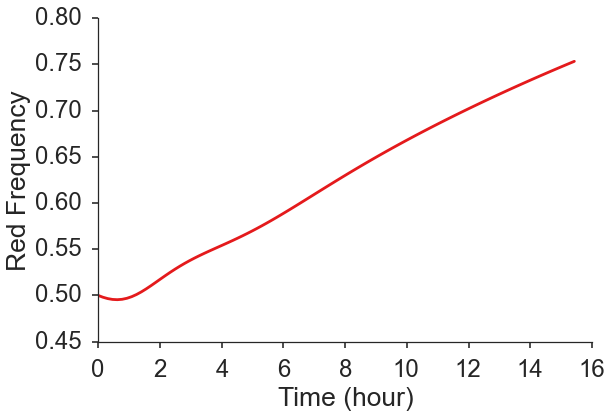

In [19]:
p = y[:,1] / y.sum(axis=1)
plt.plot(t, p, color=R_color)
plt.xlabel('Time (hour)')
plt.ylabel('Red Frequency')
sns.despine()
plt.tight_layout()
plt.savefig("frequency.png", bbox_inches='tight')

LTEE (Wiser & Lenski 2015):
$$
s = 1 - \frac{\log{\frac{A_t}{A_0}}}{\log{\frac{B_t}{B_0}}} = 1 - \frac{\log{A_t} - \log{A_0}}{\log{B_t} - \log{B_0}}
$$

Chevin 2011:
$$
s = \frac{d}{dt} \log{\frac{p}{1-p}}
$$

Kimura & Crow 1970:
$$
s = \frac{1}{t} \log{\frac{A_t B_0}{A_0 B_t}} = \frac{\log{A_t} + \log{B_0} - \log{A_0} - \log{B_t}}{t}
$$

In [20]:
s_LTEE = lambda i: 1 - np.log(y[i,0]/(y[0,0])) / np.log(y[i,1]/y[0,1])
s_KC70 = lambda i: 1./t[i] * np.log(y[i,1] * y[0,0] / (y[0,1] * y[i,0])) 
s = lambda p,t: np.gradient(np.log(y[:,1]/y[:,0]), t)

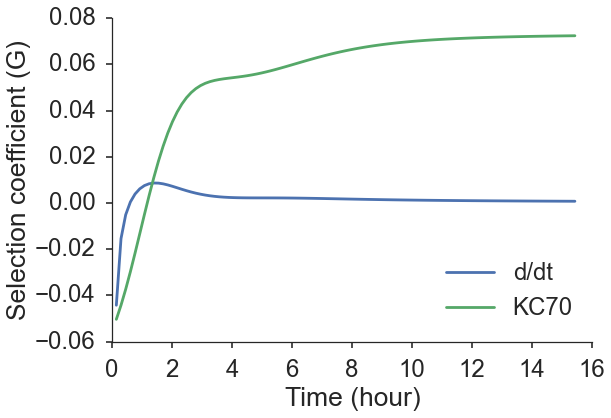

In [21]:
plt.plot(t, s(p,t), label='d/dt')
#plt.plot(t[1:], [s_LTEE(i) for i in range(1,len(t))], '--', label='LTEE')
plt.plot(t[1:], [s_KC70(i) for i in range(1,len(t))], label='KC70')

plt.xlabel('Time (hour)')
plt.ylabel('Selection coefficient (G)')
plt.legend(loc='lower right')
sns.despine()
plt.tight_layout()
plt.savefig("selection_coefficient.png", bbox_inches='tight')

<Parameter 'y0', value=0.47889672371130304 +/- 0.00082, bounds=[-inf:inf]>
<Parameter 'K', value=1 (fixed), bounds=[-inf:inf]>
<Parameter 'r', value=0.077699331064071897 +/- 0.0004, bounds=[-1:1]>


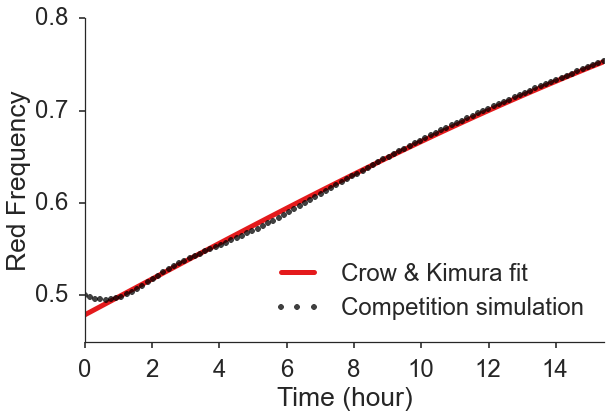

In [22]:
params = curveball.models.logistic_model.make_params(y0=p.min(), K=1, r=0)
params['r'].set(min=-1,max=1)
params['K'].set(vary=False)
params['y0'].set(vary=True)
fit = curveball.models.logistic_model.fit(p, t=t, params=params)
ax = fit.plot_fit(
    data_kws={'marker':'.', 'color':'k', 'alpha':0.75}, 
    fit_kws={'lw':5, 'color':R_color}, 
    init_kws={'ls':''}
)
ax.get_lines()[0].set_label('')
ax.get_lines()[1].set_label('Crow & Kimura fit')
ax.get_lines()[2].set_label('Competition simulation')
ax.set_xlim(0,df.Time.max())
ax.legend(loc='lower right', numpoints=3)#.set_visible(False)
ax.set_title('')
ax.set_ylabel('Red Frequency')
ax.set_xlabel('Time (hour)')
ax.set_yticks([0.5,0.6,0.7,0.8])
sns.despine()
print fit.params['y0']
print fit.params['K']
print fit.params['r']
plt.tight_layout()
ax.figure.savefig('frequency_fit.png', bbox_inches='tight')